In [ ]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import Unet
from tool.evaluate import *

In [ ]:
model = Unet().to('cuda')

In [ ]:
inputs = torch.Tensor(np.load('inputs.npy')).to('cuda')
labels = np.load('outputs.npy')

In [ ]:
inputs_test = torch.Tensor(np.load('inputs_test.npy')).to('cuda')
labels_test = np.load('outputs_test.npy')

In [ ]:
checkpoint = torch.load('model_unet_pi_b3_elr_w1000/model_10000.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

Unet(
  (maxpool): MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(32, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder3): Sequential(
    (0): Conv3d(128, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder4): Sequential(
    (0): Conv3d(256, 256, kernel_size=(2, 2, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), p

In [ ]:
idx = 0

In [ ]:
b_norm = 2500

In [ ]:
b = model(torch.permute(inputs[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b = b.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B = labels[idx, ...]*b_norm
B = B.transpose(1, 2, 3, 0)

In [ ]:
b.shape, B.shape

((513, 257, 50, 3), (513, 257, 50, 3))

In [ ]:
b_test = model(torch.permute(inputs_test[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b_test = b_test.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_test = labels_test[idx, ...]*b_norm
B_test = B_test.transpose(1, 2, 3, 0)

{'c_vec': 0.915808, 'c_cs': 0.7041364219021397, 'c_cs_ep': 0.5937982114820124, "E_n'": 0.5269440114498138, "E_m'": 0.15247093089403152, "E_m'_ep": -980626.215815414, 'eps': 0.7287161}


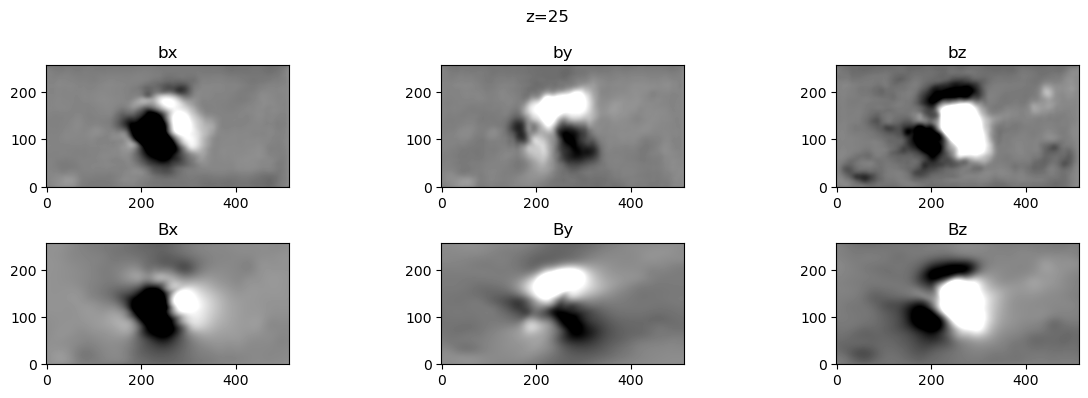

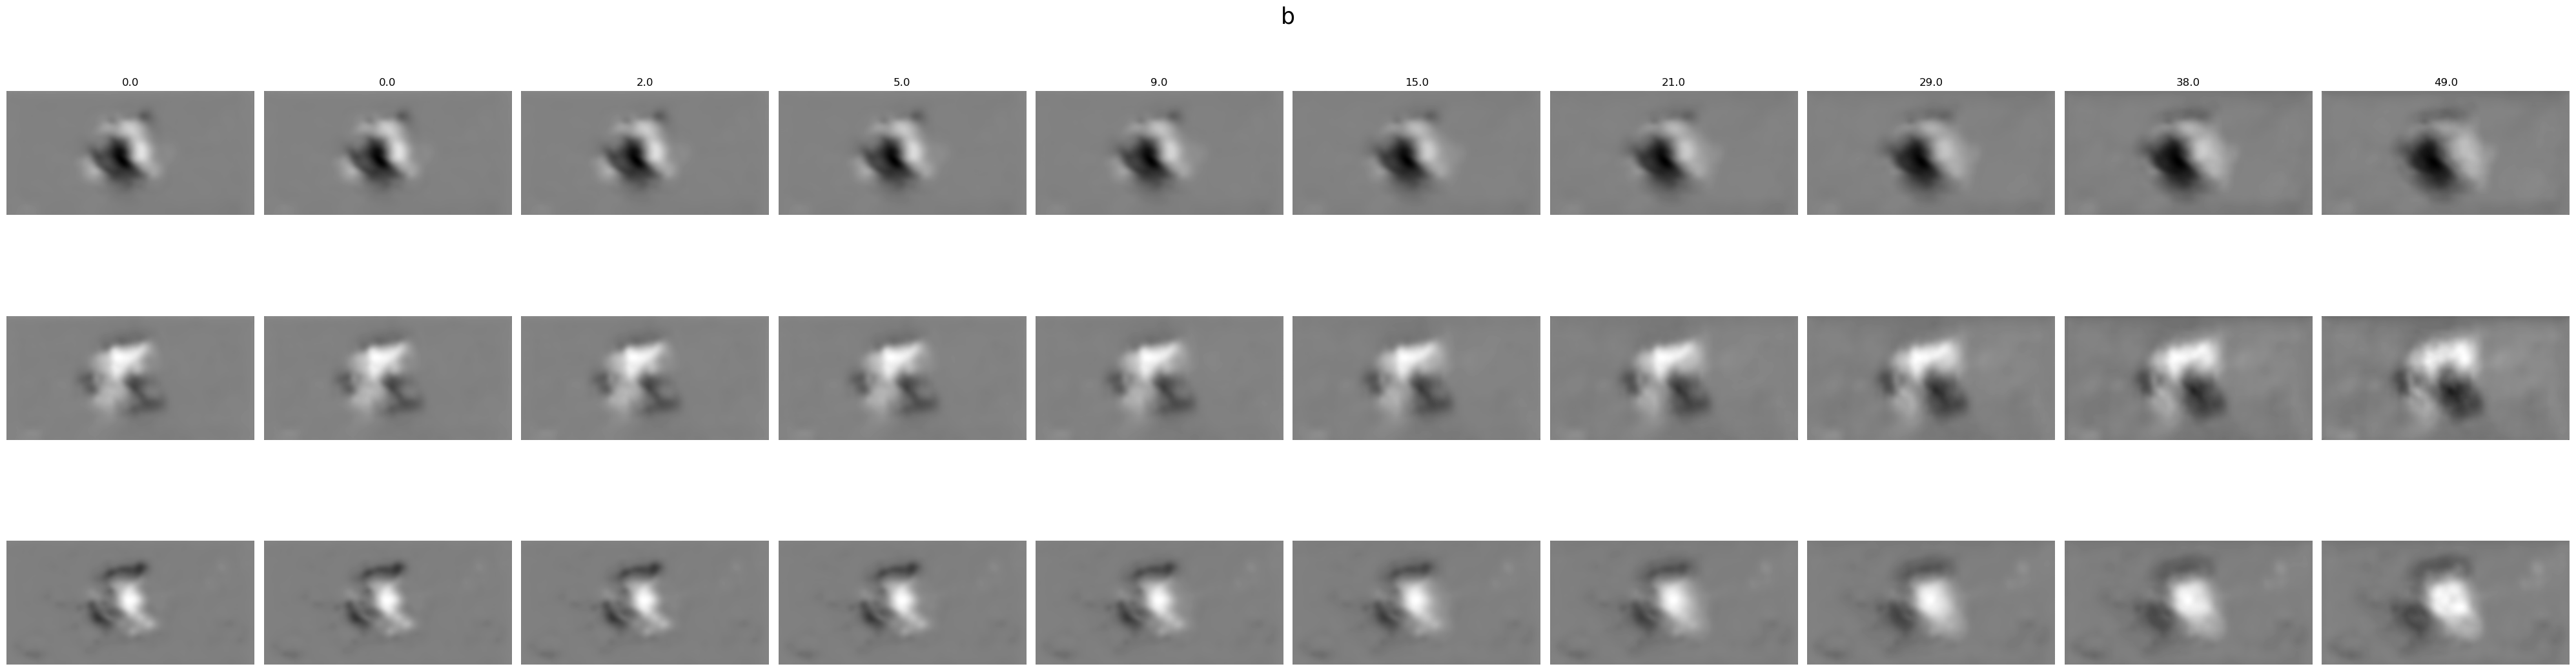

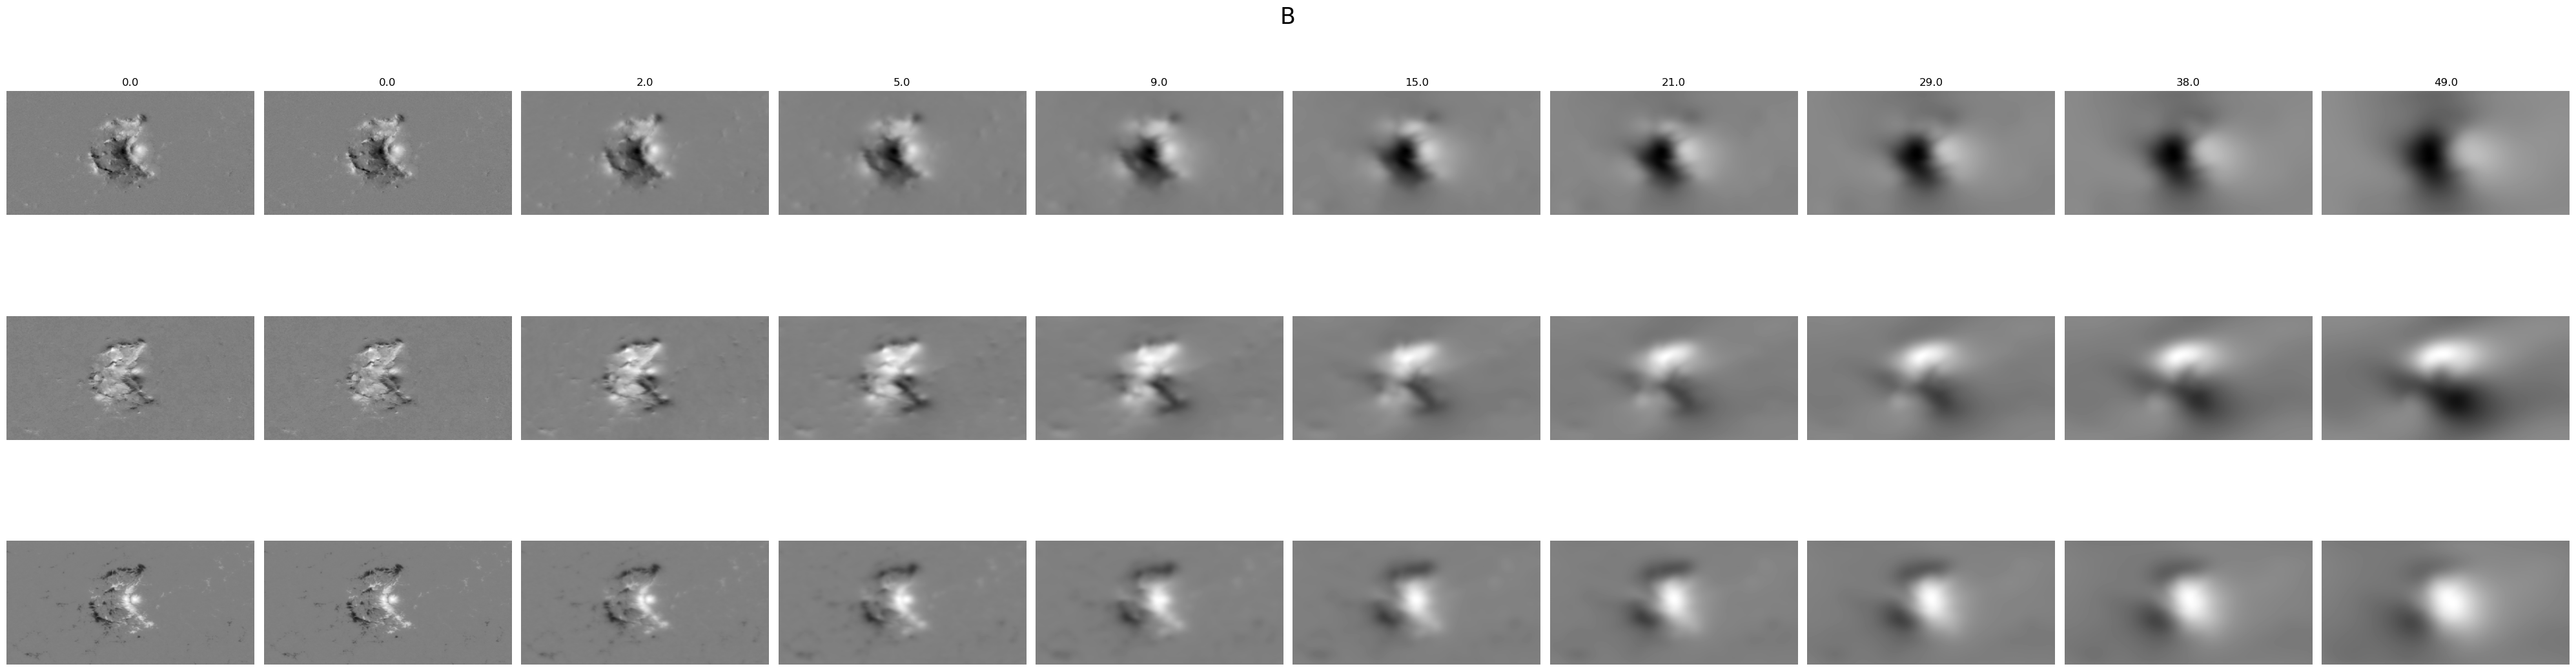

In [ ]:
print(metric(b, B))
plot_overview(b, B, z=25, b_norm=100)
plot_sample(b, B)

{'c_vec': 0.8187788, 'c_cs': 7.072121722377712, 'c_cs_ep': 0.38259604371932854, "E_n'": 0.32967430353164673, "E_m'": -0.033295408863706966, "E_m'_ep": -977968.6080120751, 'eps': 0.71557456}


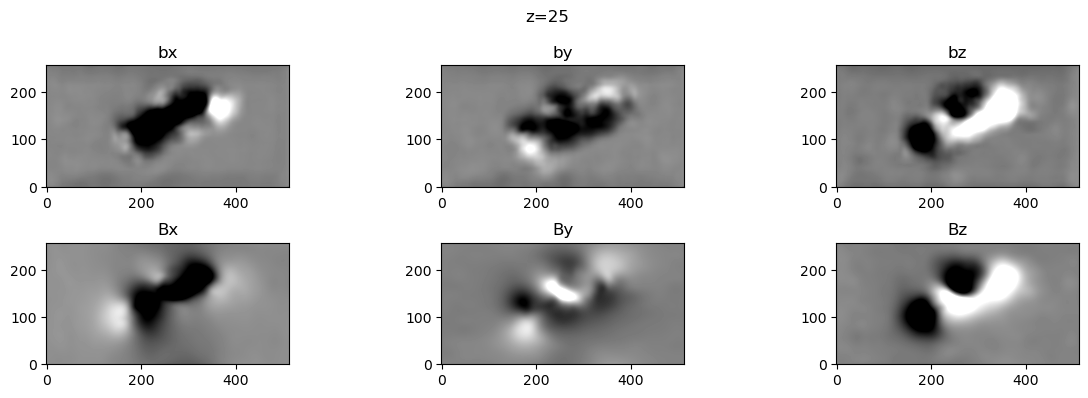

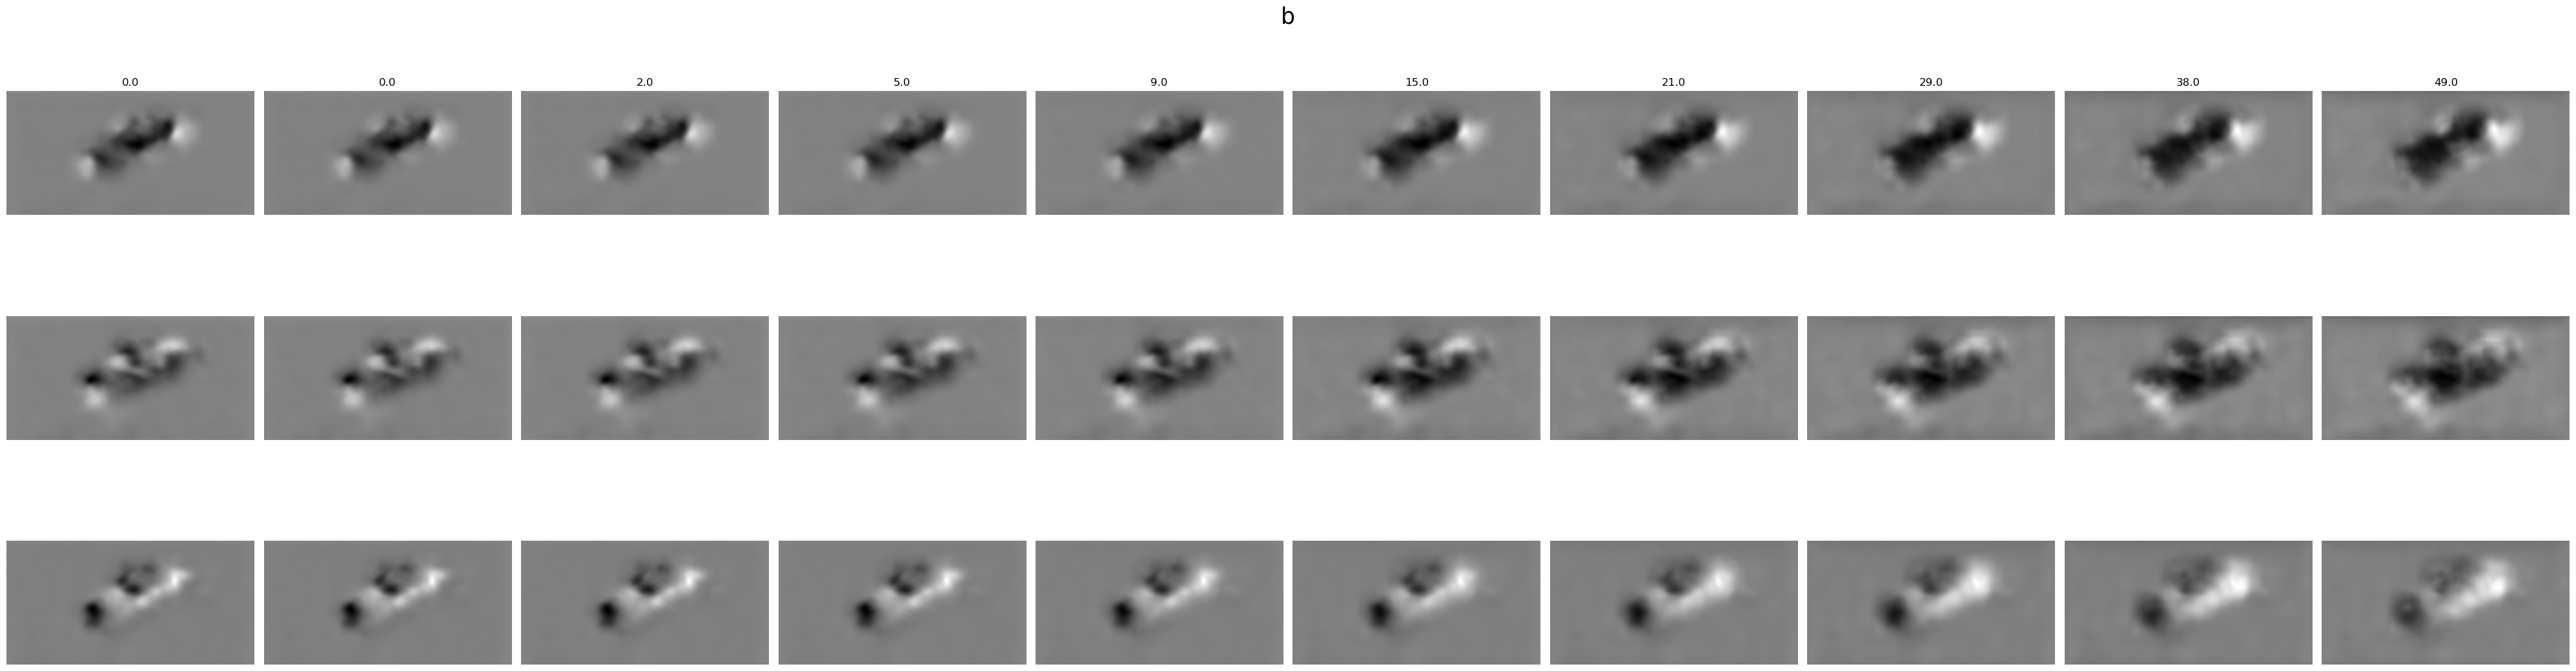

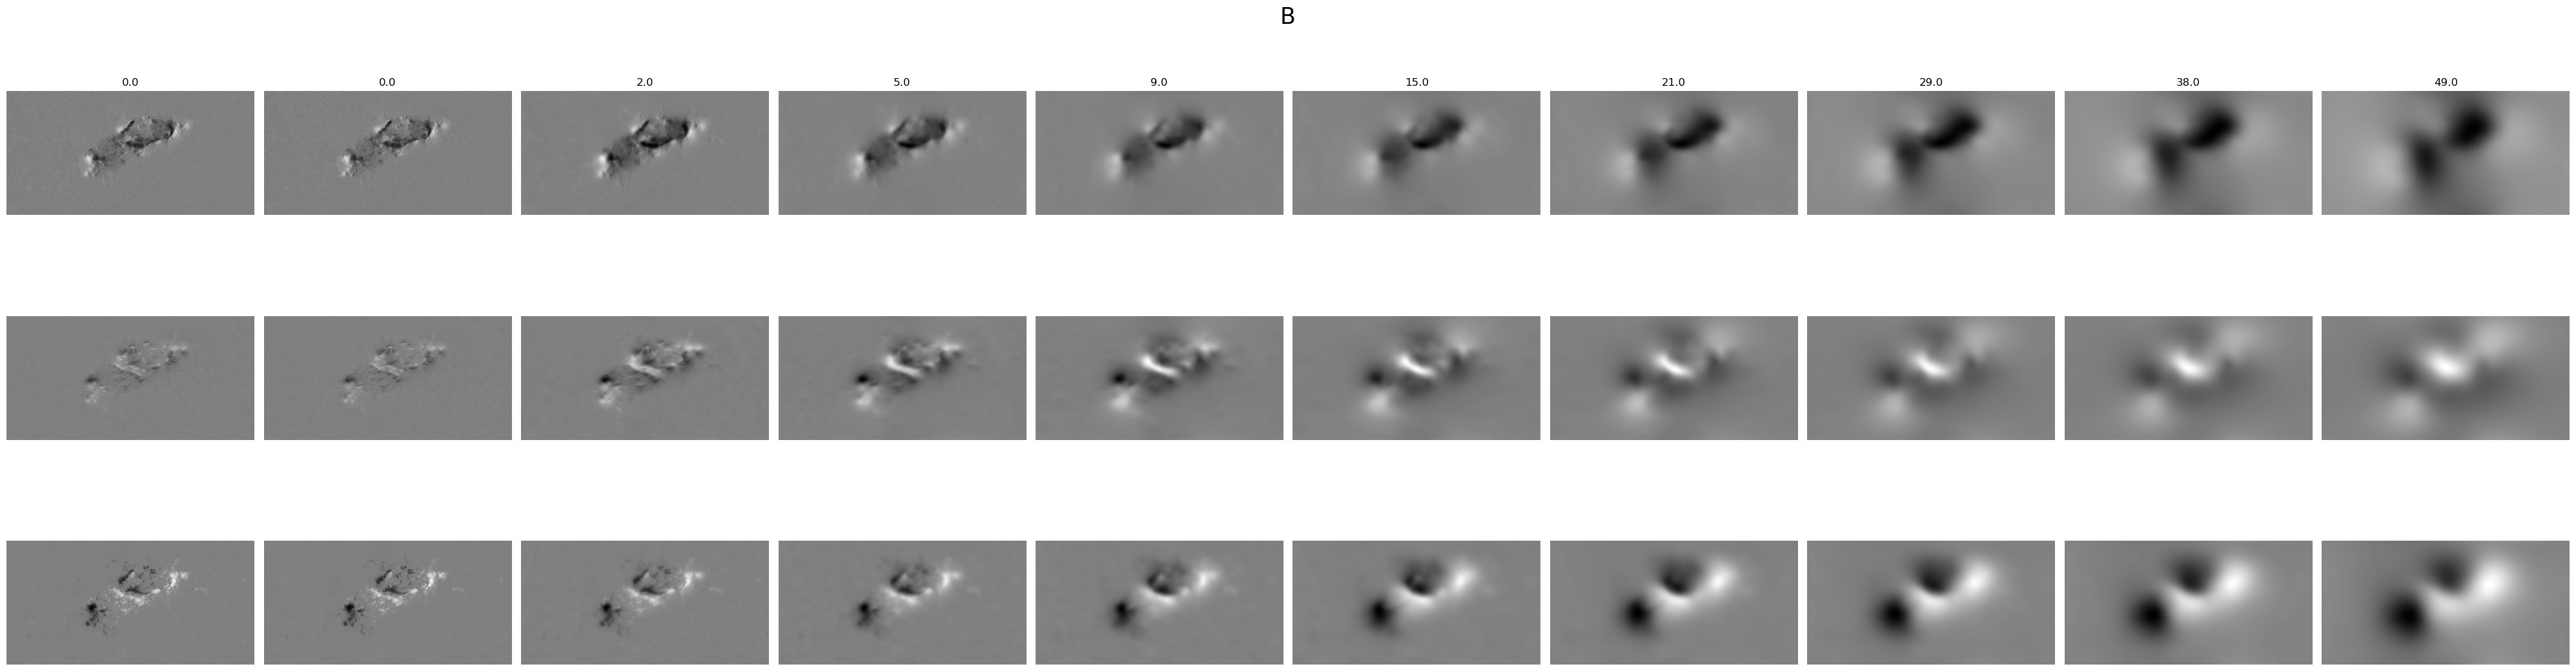

In [ ]:
print(metric(b_test, B_test))
plot_overview(b_test, B_test, z=25, b_norm=100)
plot_sample(b_test, B_test)